<a href="https://colab.research.google.com/github/Tonoyama/DL-Study/blob/master/Answer_original_data_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自作データセットを CNN(Convolutional Neural Network) で分析する

今まで、MNIST や Fasion MNIST といった有名なデータセットを使ってきたが、研究や趣味などで自分の好きなデータセットを分類したい場合は多い。

今回は、自作データセットを読み込み CNN で分類を行う。

## データセットを用意する

今回は 手作業でも `curl` でも出来るようにしている。

手作業の場合、下記の URL から zip ファイルをダウンロードし、Google ドライブにファイルをアップロードする。

https://www.microsoft.com/en-us/download/details.aspx?id=54765


`drive.mount('/content/drive')` でドライブをマウントし、`MyDrive`内にある zip ファイルを `unzip` する。

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!curl https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -o cat_dog.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   196M      0  0:00:04  0:00:04 --:--:--  196M


In [21]:
!unzip /content/cat_dog.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetIm

## `OpenCV` の使い方

`OpenCV` は BSDライセンスの画像処理ライブラリ。Python と C++ で使える。

`OpenCV` 以外にも `Pillow` や `Numpy` も画像処理に使う。

標準画像データベースSIDBA(Standard Image Data-BAse)が公開している有名な画像を使う。

http://www.ess.ic.kanagawa-it.ac.jp/app_images_j.html よりマンドリル(サルの一種)の画像を `curl` で取ってくる。

`-o` オプションで `Mandrill.jpg` という名前にする。

`colab` ファイル内に `Mandrill.jpg` が増えている。

In [26]:
!curl http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/Mandrill.jpg -o Mandrill.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9238  100  9238    0     0  11738      0 --:--:-- --:--:-- --:--:-- 11723



`opencv 画像 表示` で検索し、画像(`Mandrill.jpg`)を**グレースケール**で表示する。

このとき、`colab` 特有のエラーが出たりする場合もあるので、その際は、エラーログを調べる。

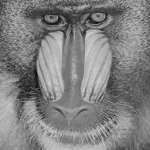

In [36]:
import cv2
from google.colab.patches import cv2_imshow

img_name = "Mandrill.jpg"

img = cv2.imread(img_name, 0)
cv2_imshow(img)

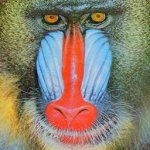

In [37]:
img = cv2.imread(img_name)
cv2_imshow(img)

`opencv python` で検索すると様々な機能を紹介するチュートリアルを見つけられる。

遊んでみると結構楽しい

カラー画像のヒストグラムをプロットしてみると、赤と青の輝度が大きい事が分かる

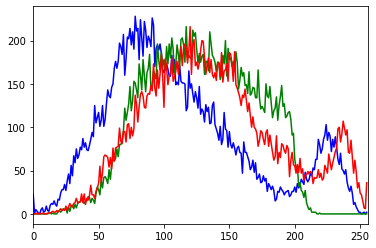

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(img_name)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

エッジ検出してみる。

`min_val` を 100、`max_val` を 200 ぐらいにするといい感じ

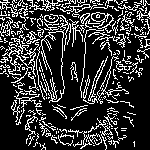

In [63]:
import cv2

gray_img = cv2.imread(img_name, 0)
canny_img = cv2.Canny(gray_img, 100, 200)
cv2_imshow(canny_img)

## グレイスケールで読み込み

`cv2.imread` で読み込み。


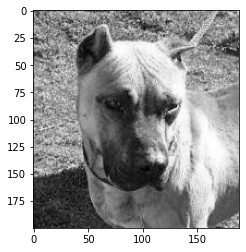

(200, 189)
[[116 153 127 ... 172 182 170]
 [114 113 106 ... 157 199 224]
 [184 141 112 ... 109 170 223]
 ...
 [ 66  36  40 ... 172 131 135]
 [ 85  39  49 ... 156 148 127]
 [ 78  35  61 ... 180 213 168]]


In [22]:
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)

    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
  
print(img_array.shape)
print(img_array)

## カラーで読み込み

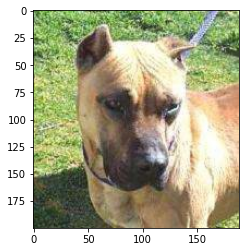

In [23]:
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)

    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), )
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break

学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 0
学習データのラベル： 0


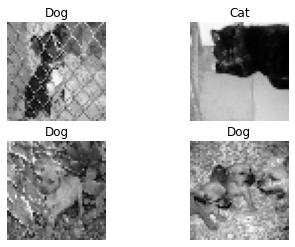

In [24]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50
training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X_train = []  # 画像データ
y_train = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)

# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    plt.imshow(X_train[i], cmap='gray')

plt.show()

学習データのラベル： 1
学習データのラベル： 1
学習データのラベル： 0
学習データのラベル： 0


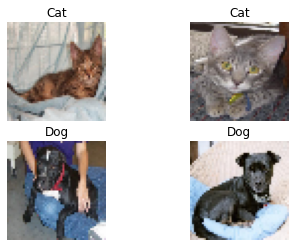

In [38]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50

training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X = []  # 画像データ
y = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X.append(feature)
    y.append(label)

# numpy配列に変換
X = np.array(X)
y = np.array(y)

# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y[i] == 0 else 'Cat')
    img_array = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)

plt.show()

`shape` でデータの次元数を確認する

50 x 50 の RGB であることがわかる

In [71]:
print(X.shape)
print(y.shape)

(24946, 50, 50, 3)
(24946,)


ホールドアウト法でデータセットを分割

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100,
                                                    stratify=y)

X_train, X_test, y_train, y_test の次元を確認する

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19956, 50, 50, 3)
(4990, 50, 50, 3)
(19956,)
(4990,)


`BGR` になっているので `RGB` に変更する。

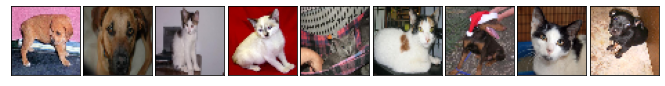

In [74]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_array, cmap='gray')

`X_train`, `X_test` は画素値を `255` で割ることで `0` ~ `1` に正規化する。

`y_train`, `y_test` は正解ラベルを One-hot エンコーディングする。keras を使うと簡単。

In [75]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape((X_train.shape[0], 50, 50, 3)) / 255
X_test = X_test.reshape((X_test.shape[0], 50, 50, 3)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train, X_test, y_train, y_test の次元を確認すると変わっている点がある。

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19956, 50, 50, 3)
(4990, 50, 50, 3)
(19956, 2)
(4990, 2)


In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)